## Performance Metrics which is used to evaluate the model:

- mAP@0.5
- mAP@0.75
- mAP@0.5-0.95
- mIoU


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        35
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


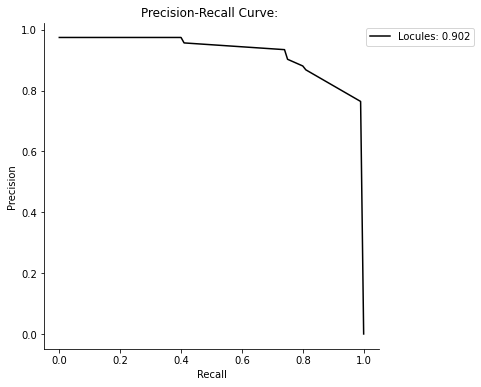

,AP_50,AP_75,mAP
0,0.902299,0.827989,0.633037


In [12]:
%matplotlib inline

import pandas as pd
from utils.performance_metric import compute_performance_metrics
from evaluations.utils.test_model import initialize_test_model

# Usage
dataset_test, test_model, test_config = initialize_test_model(
    model_name="mask_rcnn_locules_0080.h5", 
    backbone="resnet101"
)

image_ids = dataset_test.image_ids
metrics = compute_performance_metrics(image_ids=image_ids, test_model=test_model, dataset_test=dataset_test, test_config=test_config)

metrics_df = pd.DataFrame(
    columns=["AP_50", "AP_75", "mAP"],
    data=[[metrics["AP_50"], metrics["AP_75"], metrics["mAP"]]]
)

# Display the DataFrame
metrics_df